Data source: https://data.europa.eu/data/datasets/6dsf-6m94?locale=en  
Description: https://ec.europa.eu/sfc/sites/default/files/QG%20pdf/CCI_0.pdf
    

In [13]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
%matplotlib inline

In [14]:
# Reading data

df = pd.read_csv('6dsf-6m94.csv')

df.head()

,ms,Country,ir_year,ir_status,fund,Investment Priority,in_jobsearch,in_education_or_training,gaining_a_qualification,in_employment,any_successful_outcome,in_employment_6_months_after_leaving,improved_labour_market_situation_6_months_after_leaving,Directorate General,Funds,Type of Object
0,IT,Italy,2018,Accepted by EC,ESF,8i,0.00,0.0,0.00,0.14,0.13,0.25,0.0,EMPL,SF,"Operational Programme (ERDF, CF, ESF, EMFF, YE..."
1,PL,Poland,2017,Accepted by EC,ESF,9iv,0.00,0.0,0.00,0.00,0.00,0.00,0.0,REGIO,M2,"Operational Programme (ERDF, CF, ESF, EMFF, YE..."
2,IT,Italy,2015,Accepted by EC,ESF,8iii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMPL,SF,"Operational Programme (ERDF, CF, ESF, EMFF, YE..."
3,FR,France,2017,Accepted by EC,ESF,10iii,0.11,0.0,0.49,0.02,0.51,0.00,0.0,REGIO,M2,"Operational Programme (ERDF, CF, ESF, EMFF, YE..."
4,FR,France,2018,Accepted by EC,YEI,8ii,0.00,0.0,0.00,0.00,0.00,0.00,NaN,EMPL,M9,"Operational Programme (ERDF, CF, ESF, EMFF, YE..."


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   ms                                                       1000 non-null   object 
 1   Country                                                  1000 non-null   object 
 2   ir_year                                                  1000 non-null   int64  
 3   ir_status                                                1000 non-null   object 
 4   fund                                                     1000 non-null   object 
 5   Investment Priority                                      1000 non-null   object 
 6   in_jobsearch                                             485 non-null    float64
 7   in_education_or_training                                 591 non-null    float64
 8   gaining_a_qualification      

In [16]:
df = df.fillna(0)

In [17]:
# Creating groups based un success rate

df['sm'] = df[['in_jobsearch', 'in_education_or_training', 'gaining_a_qualification', 'in_employment', 'in_employment_6_months_after_leaving', 'improved_labour_market_situation_6_months_after_leaving']].mean(axis=1)

# Defining custom bin edges
bin_edges = [0, 0.125, 0.25, 0.375, 0.50]

df['group'] = pd.cut(df['sm'], bins=bin_edges, labels=['low', 'low-mid', 'high-mid', 'high'], right=False)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   ms                                                       1000 non-null   object  
 1   Country                                                  1000 non-null   object  
 2   ir_year                                                  1000 non-null   int64   
 3   ir_status                                                1000 non-null   object  
 4   fund                                                     1000 non-null   object  
 5   Investment Priority                                      1000 non-null   object  
 6   in_jobsearch                                             1000 non-null   float64 
 7   in_education_or_training                                 1000 non-null   float64 
 8   gaining_a_qualifica

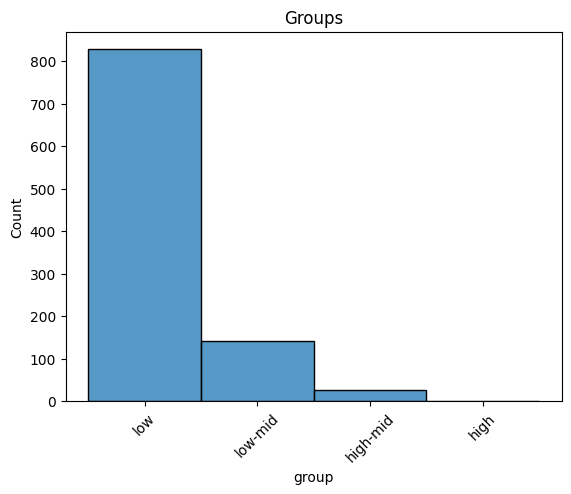

In [19]:
# Plotting data

sns.histplot(data = df, x = 'group')
plt.xticks(rotation=45)
plt.title('Groups')

plt.show()

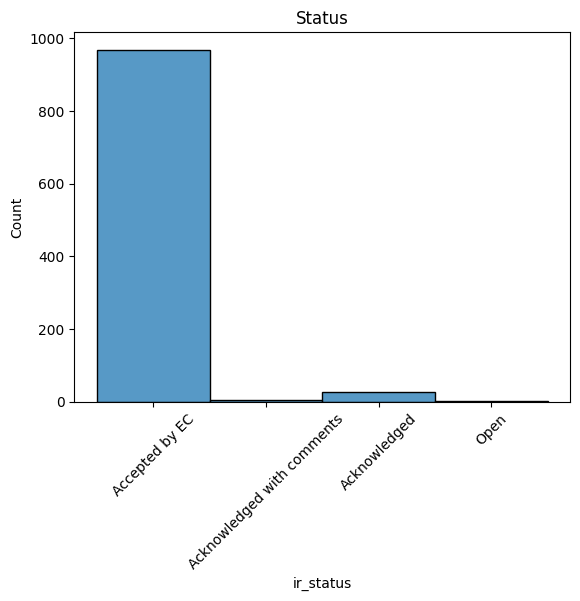

In [20]:
# Plotting data

sns.histplot(data = df, x = 'ir_status')
plt.xticks(rotation=45)
plt.title('Status')

plt.show()

# 
Most of the projects are accepted

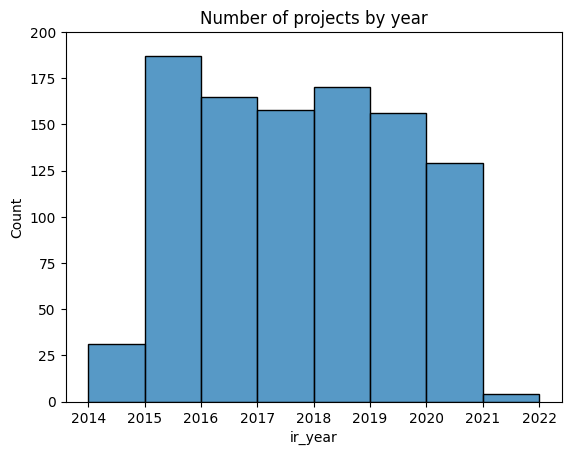

In [21]:
# Plotting data

sns.histplot(data=df, x='ir_year', bins=8)
plt.title('Number of projects by year')
plt.ylim(0, 200)

plt.show()

# 
We can observe maximum number of projects in 2015 with slow decrease and big drop in 2021 to almost zero

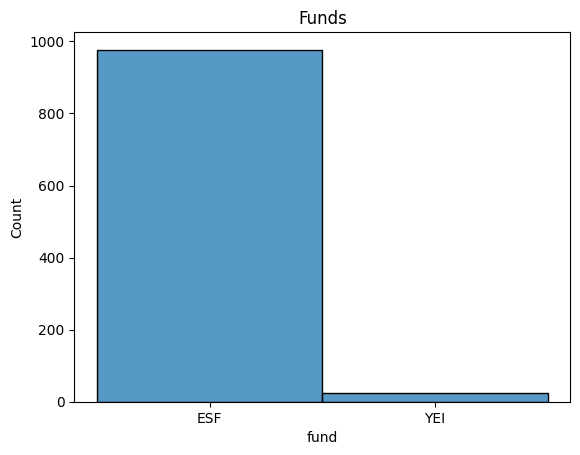

In [22]:
# Plotting data

sns.histplot(data=df, x='fund')
plt.title('Funds')

plt.show()

In [23]:
percentage = (df['fund'] == 'ESF').mean() * 100
percentage

97.7

# 
97.7% of all projects are funded by European Social Fund and only small portion by Youth Employment Initiative

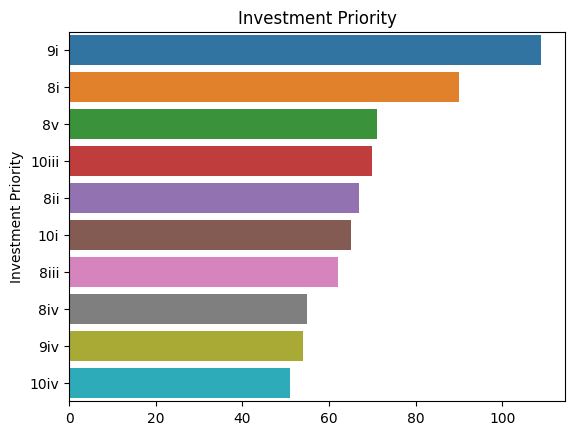

In [24]:
# plotting data

top_10 = df['Investment Priority'].value_counts().nlargest(10)
sorted_data = df[df['Investment Priority'].isin(top_10.index)]
ax = sns.barplot(x=top_10.values, y=top_10.index, order=top_10.index)
plt.title('Investment Priority')

plt.show()

# 
Most frequent priority is 9i - Active inclusion, including with a view to promoting equal opportunities and active participation, and improving employability.   
Second place is 8i - Access to employment for job seekers and inactive people, including the long term unemployed and people far from the labour market, also through local employment initiatives and support for labour mobility.  
Investment Priority 10iv (Improving the labour market relevance of education and training systems facilitating the transition from education to work, and strengthening vocational education and training systems and their quality, including through mechanisms for skills anticipation, adaptation of curricula and the establishment and development of work based learning systems, including dual learning systems and apprenticeship schemes) is less frequent: 2 times less than  Access to employment.

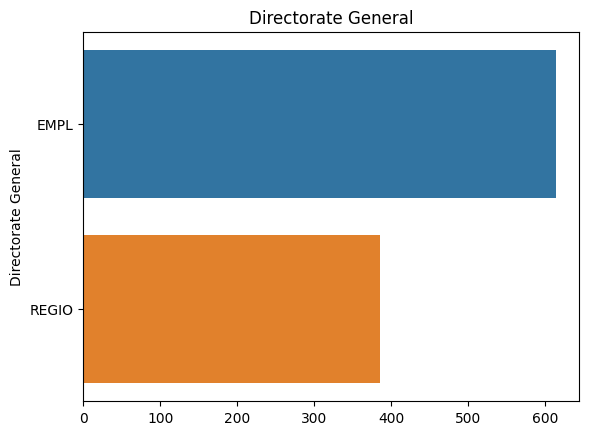

In [25]:
# plotting data

top_10 = df['Directorate General'].value_counts().nlargest(10)
sorted_data = df[df['Directorate General'].isin(top_10.index)]
ax = sns.barplot(x=top_10.values, y=top_10.index, order=top_10.index)
plt.title('Directorate General')

plt.show()

#
Majority of cases are lead by Employment, Social Affairs and Inclusion department

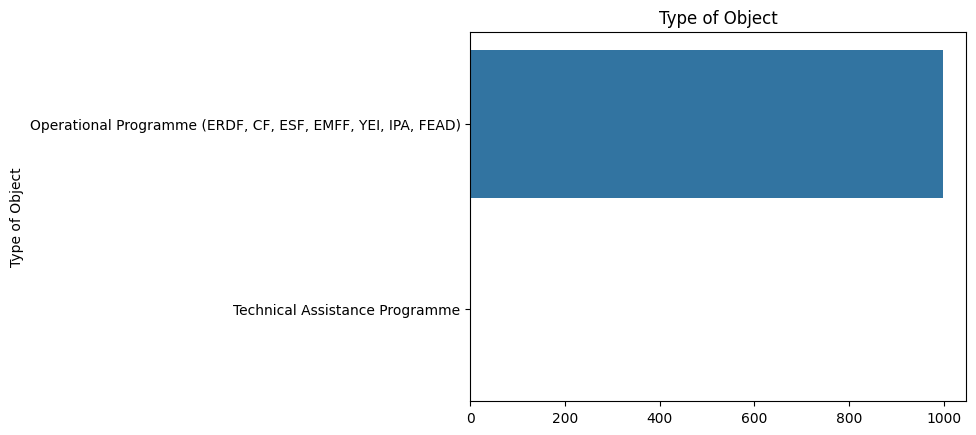

In [26]:
# plotting data

top_10 = df['Type of Object'].value_counts().nlargest(10)
sorted_data = df[df['Type of Object'].isin(top_10.index)]
ax = sns.barplot(x=top_10.values, y=top_10.index, order=top_10.index)
plt.title('Type of Object')

plt.show()

#
Current dataset contains only operational programme. Technical Assistance Programme is not included in this list

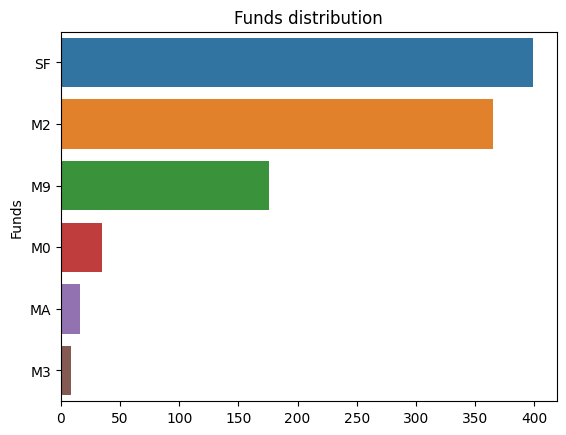

In [27]:
# plotting data

top_10 = df['Funds'].value_counts().nlargest(10)
sorted_data = df[df['Funds'].isin(top_10.index)]
ax = sns.barplot(x=top_10.values, y=top_10.index, order=top_10.index)
plt.title('Funds distribution')

plt.show()

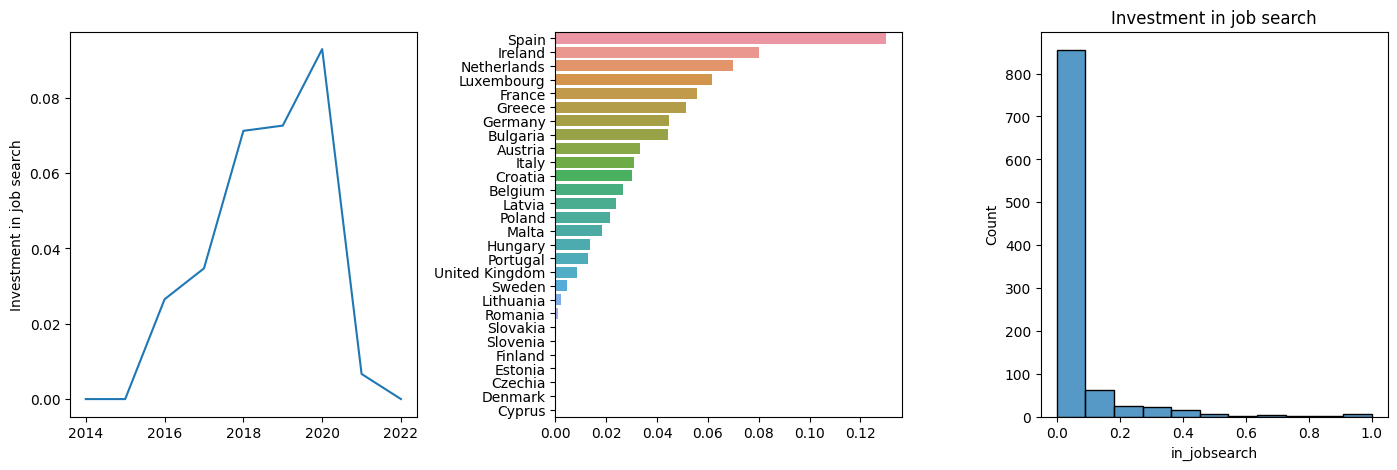

In [28]:
# plotting data

# Create the figure and axes objects
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5))
sns.lineplot(data = df, x = 'ir_year', y = 'in_jobsearch', errorbar=None, ax=ax1, estimator = 'mean')

# Create the bar plot on the second subplot
sums = df.groupby('Country')['in_jobsearch'].mean().sort_values(ascending=False)
data = sums.reset_index()
data.columns = ['Country', 'mean']
sns.barplot(data=data, x='mean', y='Country', ax=ax2)

sns.histplot(data=df, x='in_jobsearch', ax=ax3)

# setting titles and labes
ax2.set_ylabel('')
ax2.set_xlabel('')
ax1.set_xlabel('')
ax1.set_ylabel('Investment in job search')
plt.title('Investment in job search')
fig.subplots_adjust(wspace=0.4)

plt.show()

# 
The data indicates that the investment in job search was at its highest level of effectiveness between 2019 and 2020, with a significant drop in 2021.   
Spain appears to have most effective investment in this area.

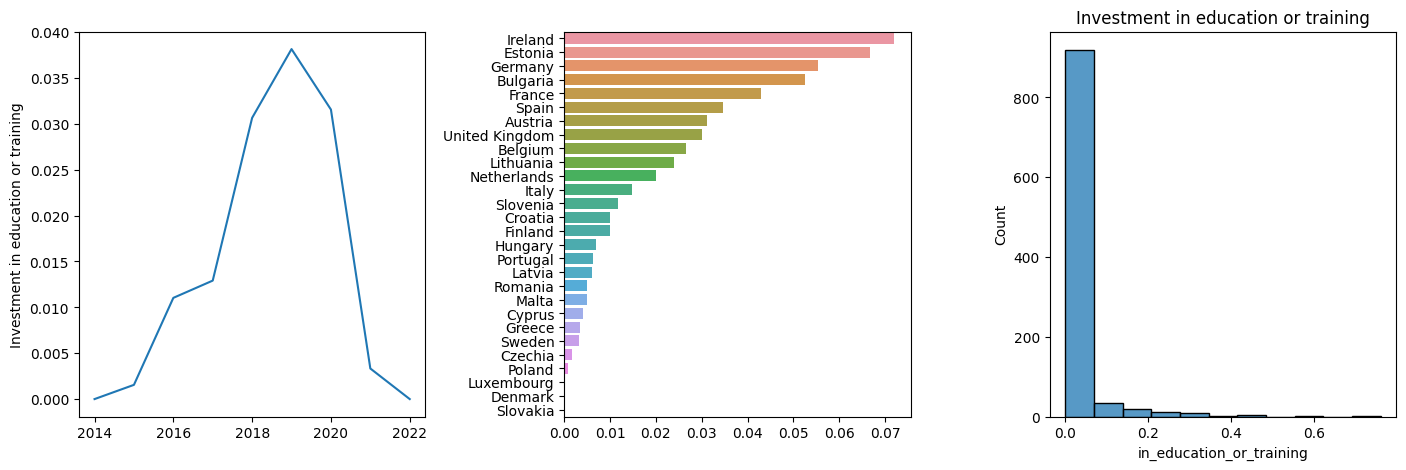

In [29]:
# plotting data

# Create the figure and axes objects
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5))
sns.lineplot(data = df, x = 'ir_year', y = 'in_education_or_training', errorbar=None, ax=ax1, estimator = 'mean')

# Create the bar plot on the second subplot
sums = df.groupby('Country')['in_education_or_training'].mean().sort_values(ascending=False)
data = sums.reset_index()
data.columns = ['Country', 'mean']
sns.barplot(data=data, x='mean', y='Country', ax=ax2)

sns.histplot(data=df, x='in_education_or_training', ax=ax3)

# setting titles and labes
ax2.set_ylabel('')
ax2.set_xlabel('')
ax1.set_xlabel('')
ax1.set_ylabel('Investment in education or training')
plt.title('Investment in education or training')
fig.subplots_adjust(wspace=0.4)

plt.show()

# 
For education and training picture is different: Irish and Estonian projects are also have significant rates along with Germany

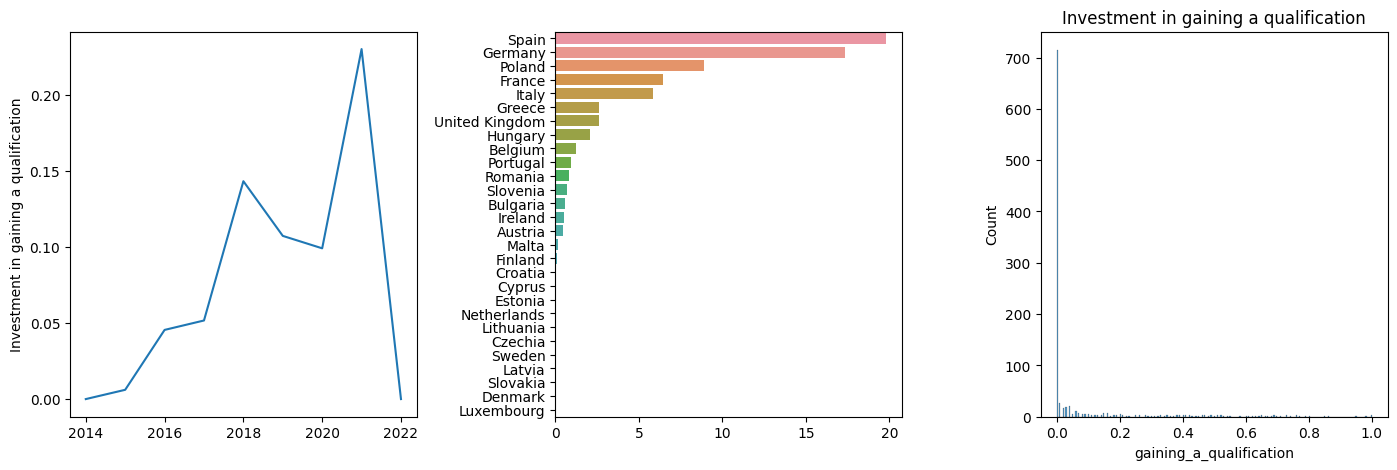

In [30]:
# plotting data

# Create the figure and axes objects
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5))
sns.lineplot(data = df, x = 'ir_year', y = 'gaining_a_qualification', errorbar=None, ax=ax1, estimator = 'mean')

# Create the bar plot on the second subplot
sums = df.groupby('Country')['gaining_a_qualification'].sum().sort_values(ascending=False)
data = sums.reset_index()
data.columns = ['Country', 'mean']
sns.barplot(data=data, x='mean', y='Country', ax=ax2)

sns.histplot(data=df, x='gaining_a_qualification', ax=ax3)

# setting titles and labes
ax2.set_ylabel('')
ax2.set_xlabel('')
ax1.set_xlabel('')
ax1.set_ylabel('Investment in gaining a qualification')
plt.title('Investment in gaining a qualification')
fig.subplots_adjust(wspace=0.4)

plt.show()

# 
Investment in gaining a qualification is effective as investment in job search. Same value in Spain and also highly significant level in Germany

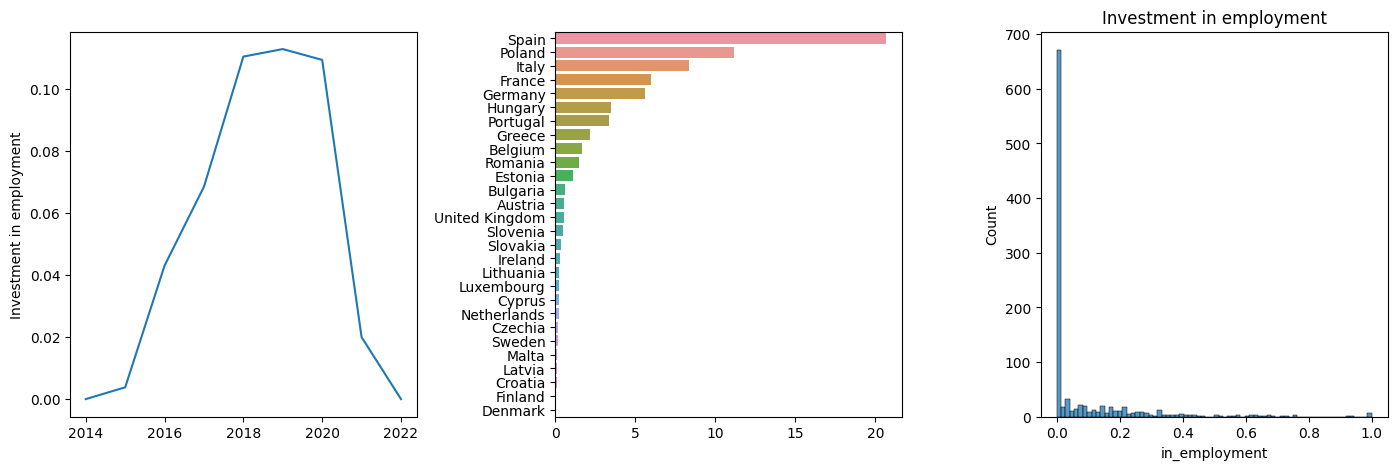

In [43]:
# plotting data

# Create the figure and axes objects
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5))
sns.lineplot(data = df, x = 'ir_year', y = 'in_employment', errorbar=None, ax=ax1, estimator = 'mean')

# Create the bar plot on the second subplot
sums = df.groupby('Country')['in_employment'].sum().sort_values(ascending=False)
data = sums.reset_index()
data.columns = ['Country', 'mean']
sns.barplot(data=data, x='mean', y='Country', ax=ax2)

sns.histplot(data=df, x='in_employment', ax=ax3)

# setting titles and labes
ax2.set_ylabel('')
ax2.set_xlabel('')
ax1.set_xlabel('')
ax1.set_ylabel('Investment in employment')
plt.title('Investment in employment')
fig.subplots_adjust(wspace=0.4)

plt.show()

#
Poland has strong positions in Investment in employment.

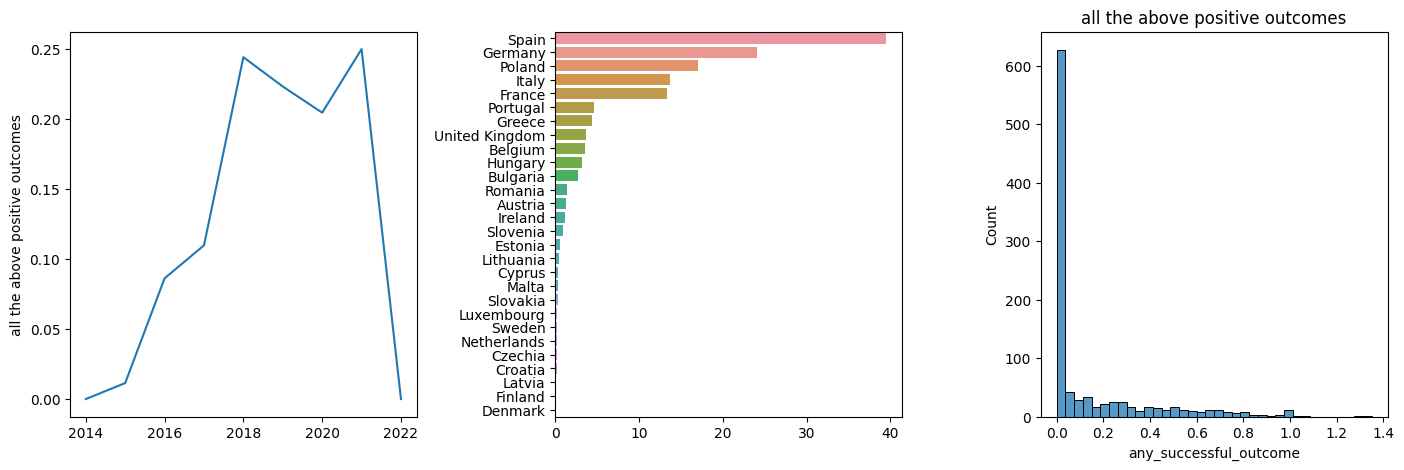

In [32]:
# plotting data

# Create the figure and axes objects
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5))
sns.lineplot(data = df, x = 'ir_year', y = 'any_successful_outcome', errorbar=None, ax=ax1, estimator = 'mean')

# Create the bar plot on the second subplot
sums = df.groupby('Country')['any_successful_outcome'].sum().sort_values(ascending=False)
data = sums.reset_index()
data.columns = ['Country', 'mean']
sns.barplot(data=data, x='mean', y='Country', ax=ax2)

sns.histplot(data=df, x='any_successful_outcome', ax=ax3)

# setting titles and labes
ax2.set_ylabel('')
ax2.set_xlabel('')
ax1.set_xlabel('')
ax1.set_ylabel('all the above positive outcomes')
plt.title('all the above positive outcomes')
fig.subplots_adjust(wspace=0.4)

plt.show()

# 
Overall for all 4 categories Spain is leading by a margin, followed by Germany and Poland, having best result in 2018 and 2021.

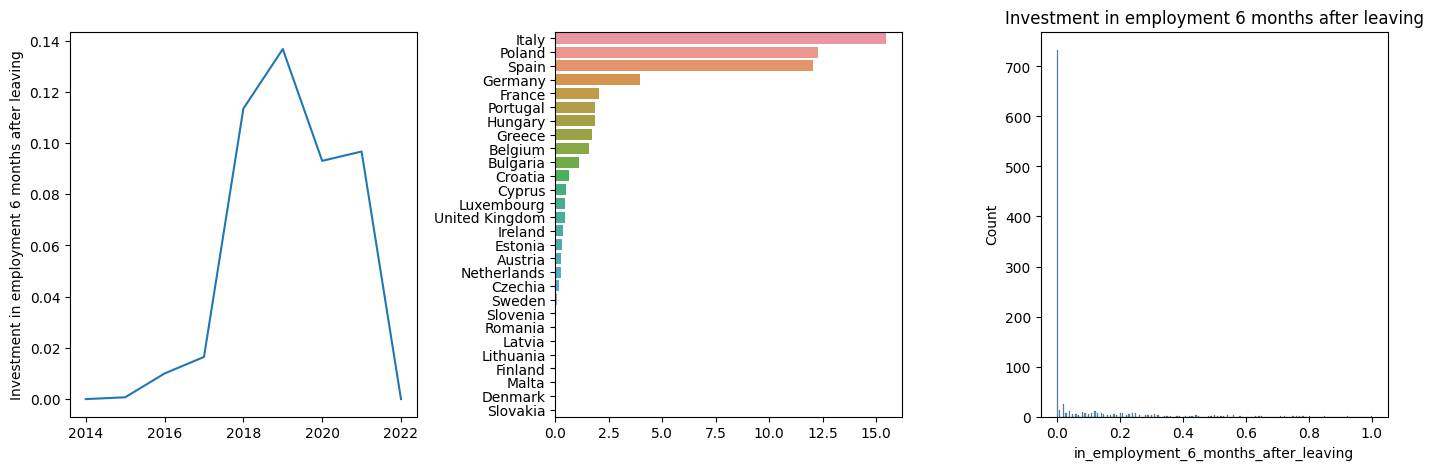

In [33]:
# plotting data

# Create the figure and axes objects
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5))
sns.lineplot(data = df, x = 'ir_year', y = 'in_employment_6_months_after_leaving', errorbar=None, ax=ax1, estimator = 'mean')

# Create the bar plot on the second subplot
sums = df.groupby('Country')['in_employment_6_months_after_leaving'].sum().sort_values(ascending=False)
data = sums.reset_index()
data.columns = ['Country', 'mean']
sns.barplot(data=data, x='mean', y='Country', ax=ax2)

sns.histplot(data=df, x='in_employment_6_months_after_leaving', ax=ax3)

# setting titles and labes
ax2.set_ylabel('')
ax2.set_xlabel('')
ax1.set_xlabel('')
ax1.set_ylabel('Investment in employment 6 months after leaving')
plt.title('Investment in employment 6 months after leaving')
fig.subplots_adjust(wspace=0.4)

plt.show()

# 
Italy is leading in effectiveness of Investment in employment 6 months after leaving

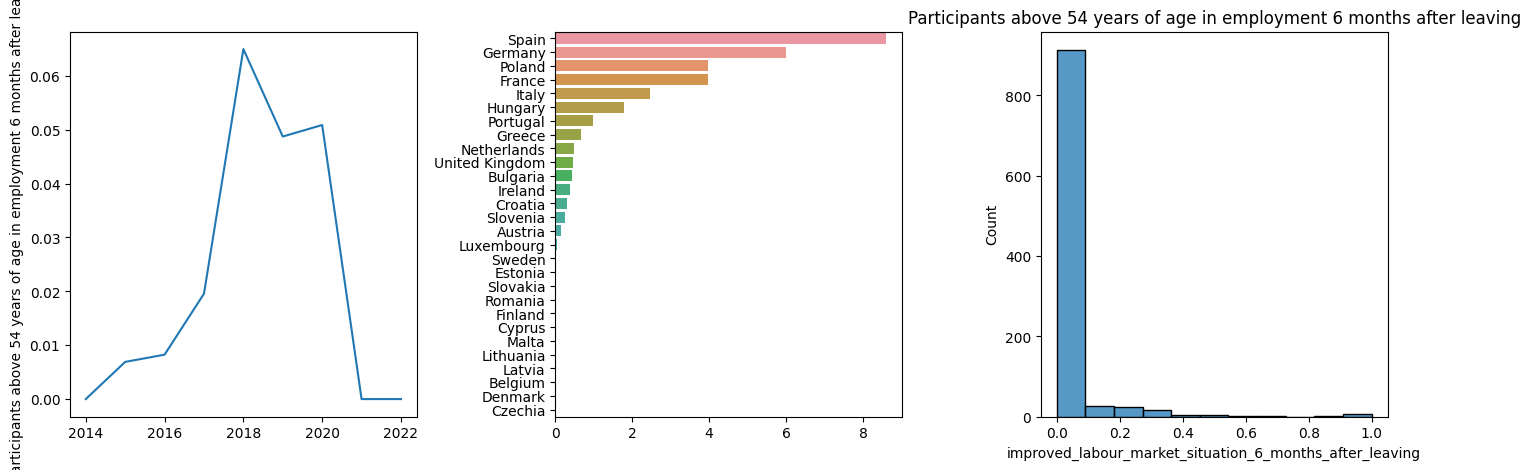

In [34]:
# plotting data

# Create the figure and axes objects
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5))
sns.lineplot(data = df, x = 'ir_year', y = 'improved_labour_market_situation_6_months_after_leaving', errorbar=None, ax=ax1, estimator = 'mean')

# Create the bar plot on the second subplot
sums = df.groupby('Country')['improved_labour_market_situation_6_months_after_leaving'].sum().sort_values(ascending=False)
data = sums.reset_index()
data.columns = ['Country', 'mean']
sns.barplot(data=data, x='mean', y='Country', ax=ax2)

sns.histplot(data=df, x='improved_labour_market_situation_6_months_after_leaving', ax=ax3)

# setting titles and labes
ax2.set_ylabel('')
ax2.set_xlabel('')
ax1.set_xlabel('')
ax1.set_ylabel('Participants above 54 years of age in employment 6 months after leaving')
plt.title('Participants above 54 years of age in employment 6 months after leaving')
fig.subplots_adjust(wspace=0.4)

plt.show()

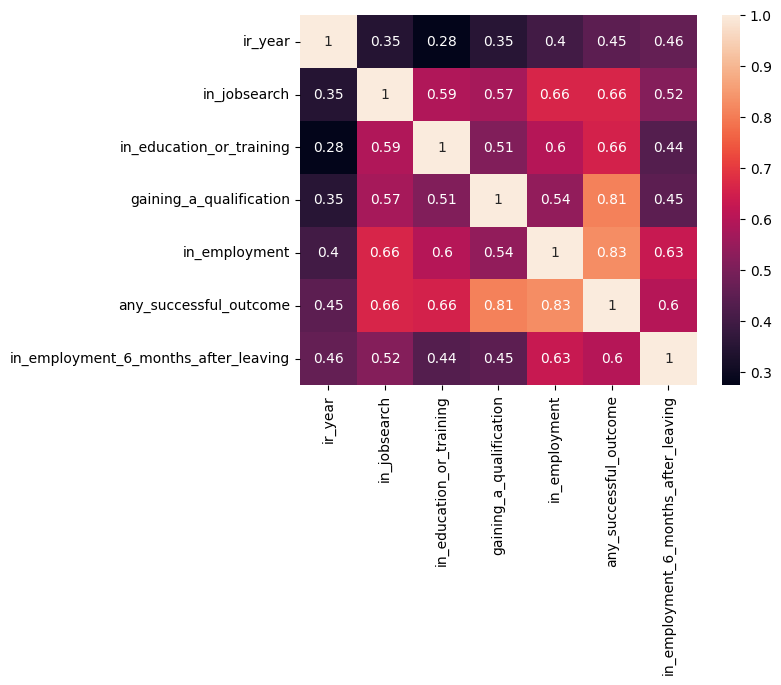

In [35]:
# Creating the heatmap
cols = df.columns[[2] + list(range(6, 12))]
CRR = df[cols].corr(method='spearman')
sns.heatmap(CRR, annot=True)

plt.show()

In [36]:
# Defining order for polinomial regression

y = 'any_successful_outcome'
x = 'gaining_a_qualification'

# Initialize an array to store the AIC values
aic_values = np.zeros(8)

# Fit binomial regression models of orders 1 to 8
for order in range(1, 9):
    # Create the formula for the current order
    formula = f'{y} ~ ' + ' + '.join([f'np.power({x}, {i})' for i in range(1, order+1)])
    
    # Fit the model
    model = smf.glm(formula=formula, data=df, family=sm.families.Binomial())
    result = model.fit()
    
    # Store the AIC value
    aic_values[order-1] = result.aic

# Find the order with the lowest AIC value
best_order = np.argmin(aic_values) + 1

# Print the results
print(f'Best order: {best_order}')

Best order: 5


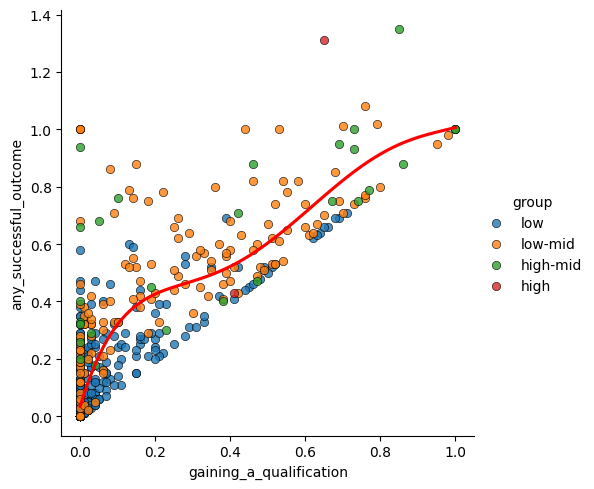

In [37]:
# Checking correlation

sns.lmplot(data = df, y = 'any_successful_outcome', x = 'gaining_a_qualification', hue = 'group', scatter_kws={'edgecolor':'black', 'linewidth':0.5}, fit_reg=False)
sns.regplot(data = df, y = 'any_successful_outcome', x = 'gaining_a_qualification', order = 5, ci = None, scatter=False, color='r')

plt.show()

In [38]:
st.spearmanr(df['gaining_a_qualification'], df['any_successful_outcome'])

SignificanceResult(statistic=0.8098675168203345, pvalue=2.0345773540856344e-233)

# 
There is a significant strong effect of investments into gaining a quailfication across all categories

In [39]:
y = 'any_successful_outcome'
x = 'in_employment'

# Initialize an array to store the AIC values
aic_values = np.zeros(8)

# Fit binomial regression models of orders 1 to 8
for order in range(1, 9):
    # Create the formula for the current order
    formula = f'{y} ~ ' + ' + '.join([f'np.power({x}, {i})' for i in range(1, order+1)])
    
    # Fit the model
    model = smf.glm(formula=formula, data=df, family=sm.families.Binomial())
    result = model.fit()
    
    # Store the AIC value
    aic_values[order-1] = result.aic

# Find the order with the lowest AIC value
best_order = np.argmin(aic_values) + 1

# Print the results
print(f'Best order: {best_order}')

Best order: 8


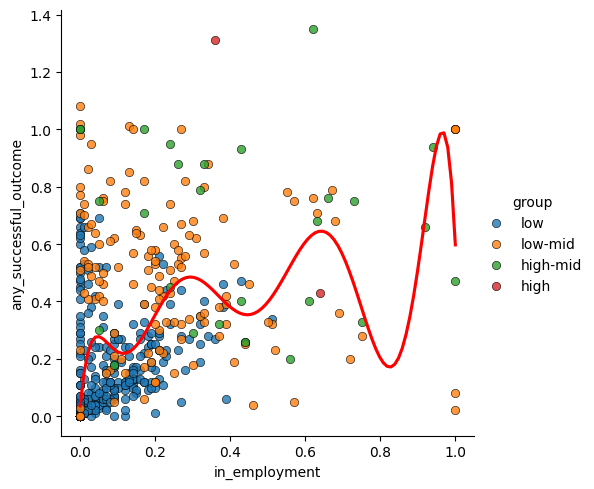

In [40]:
# Checking correlation

sns.lmplot(data = df, y = 'any_successful_outcome', x = 'in_employment', hue = 'group', scatter_kws={'edgecolor':'black', 'linewidth':0.5}, fit_reg=False)
sns.regplot(data = df, y = 'any_successful_outcome', x = 'in_employment', order = 8, ci = None, scatter=False, color='r')

plt.show()

In [41]:
st.spearmanr(df['any_successful_outcome'], df['in_employment'])

SignificanceResult(statistic=0.8280524273961528, pvalue=4.7749920911679277e-253)

#
There is also a significant strong effect of investments into employment, but more the coefficient, more is the dispersion.

In [42]:
df.to_csv('ESF.csv')